## Setup

<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1yu5U0X0LNqQ6sQyFcPMlWnVj2D6eWV7m?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [ ]:
# Python ≥3.5 is required
import sys

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn

## Get the Data

The function below merges the OECD's life satisfaction data and the IMF's GDP per capita data. We have discussed this example in class.

In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Fetch the files in datasets/lifesat

In [ ]:
import os
datapath = os.path.join("datasets", "lifesat", "")

[Uncomment the code] Code below plots pretty figures directly within Jupyter


In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Download the data

In [ ]:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

# Fill in the missing code


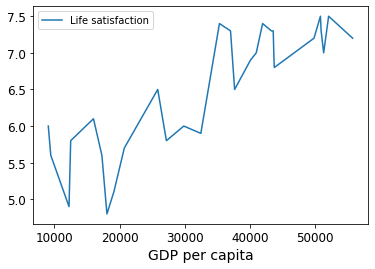

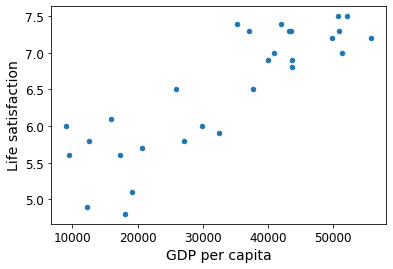

[[5.96242338]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='line', x="GDP per capita", y='Life satisfaction')
plt.show()
#Line graphs are used to track changes over short and long periods of time. When smaller changes exist.

country_stats.plot(kind='scatter', x ="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()
# The linear regression mode that we used here signifies the relationship between the indepentdent variable(GDP per capita) and dependent variable(Life satisfaction index ).


# Train the model
model.fit(X,y)
# Make a prediction for Cyprus
X_new = [[22587]]

print(model.predict(X_new)) # outputs [[ 5.96242338]]

[Update] Replace the Linear Regression model with k-Nearest Neighbors (in this example, k = 3)

In [ ]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
x_new =([[22587.0]])
print(model.predict(X_new))

[[5.96242338]]


## DONE